# Tests

In [1]:
%display latex
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

## Example 1: Simple

In [2]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [3]:
R.<x,y> = RIF[]

In [4]:
system = System(
    R,
    (x,y),
    [(4,5), (1,2)],
    [
        -y,
        x,
    ],
)

In [5]:
system.y

(-y, x)

In [6]:
def mval(x, y):
    val = RIF((var("x")^2 + var("y")^2)({var("x"): x, var("y"): y}))
    if val.upper() < 4:
        return 1
    elif val.lower() > 4:
        return -1
    else:
        return 0

In [7]:
from matplotlib.colors import LinearSegmentedColormap

In [8]:
def f(m):
    return 3*((m + 1)/2)


def finv(m):
    return 2*m/3 - 1

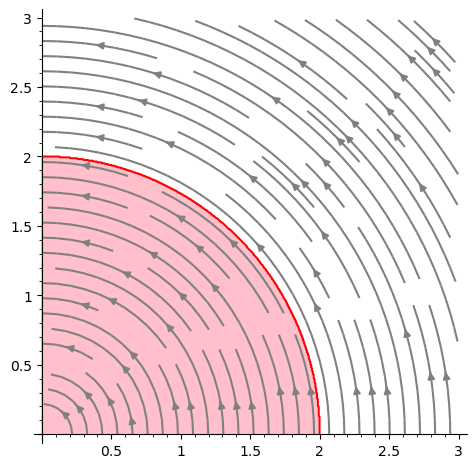

In [9]:
p = streamline_plot(tuple(system.y),(x,0,3),(y,0,3), color='grey')\
    + region_plot((lambda x, y: x^2 + y^2 < 4),
                  (x, 0, 3),
                  (y, 0, 3),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1)
p.show()

In [10]:
reach = system.with_y0([RIF(0, 3), RIF(0, 3)]).reach(2*pi, step=0.8, order=15, estimation=1e-5, cutoff_threshold=1e-10, precompose_taylor_models=True)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2


In [11]:
def rval(t0, x, y, symbolic_composition=False):
    #print(f"x = {x.str(style='brackets')}; y = {y.str(style='brackets')}")
    x = finv(x)
    y = finv(y)
    #print(f"x' = {x.str(style='brackets')}; y' = {y.str(style='brackets')}")
    with suppress_stdout():
        obs = PolyObserver(R(4 - var("x")^2 - var("y")^2), reach, symbolic_composition=symbolic_composition)
        robs = RestrictedObserver(obs, [x, y])
        res = robs(t0)
    if res.lower() > 0:
        return 1
    elif res.upper() < 0:
        return -1
    else:
        return 0

In [12]:
@interact
def _(N=slider(1,10, step_size=1), auto_update=False):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[rval(0, RIF(x, x+step),RIF(y, y+step)) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Manual interactive function <function _ at 0x7f5990ee2950> with 1 widget
  N: TransformIntSlider(value=1, desc…

In [13]:
csig1 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=True,
    restriction_method=RestrictionMethod.SYMBOLIC,
)
csig2 = Atomic(var("x")^2 + var("y")^2 < 4).context_signal_for_system(
    system.with_y0([RIF(0, 3), RIF(0, 3)]),
    2*sage.pi,
    symbolic_composition=False,
    restriction_method=RestrictionMethod.SYMBOLIC,
)

calling reach with y0 = ['[0.0000000000000000 .. 3.0000000000000000]', '[0.0000000000000000 .. 3.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x, y]
C = [0.0..3.0]
C = [0.0..3.0]
contexts = ['[0.0..3.0]', '[0.0..3.0]']
statics  = []
assigning system with dimension 2
resulting system has dimension 2
run within tmv args
integrationScheme = 2
Computed 63 flowpipes in 2.384185791015625e-06 sec
PolyObserver(-x^2 - y^2 + 4, <flowstar.reachability.Reach object at 0x7f5990128320>, 0, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = 0
creating ContextSignal with coord=() and signal_fn=functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 < 4)>, symbolic_composition=True, order=10, step=(0.001, 0.1), initial_form=<InitialForm.SPLIT_VARS: 3>) and signal = None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
converting reachset
=== in signal_fn ===
observer = <flowstar.observers.R

In [14]:
@interact
def _(N=slider(1,10, step_size=1, default=4), t0=slider(0, 2, step_size=1/32, default=0),
      symbolic_composition=checkbox(label='Symbolic composition', default=False), auto_update=False):
    colors = ['pink', 'white', 'lightgreen']
    cm = LinearSegmentedColormap.from_list('ternary colors', colors, N=3)
    n = 2**N
    step = 3 / n
    step_lim = 3/max(n, 8)
    from matplotlib import ticker
    ticks = srange(-0.5, n, n/min(n, 8), include_endpoint=True)
    gridlines = srange(0.5, n-0.5, 1)
    tick_formatter = ticker.FuncFormatter(lambda k, _: '{0:.2f}'.format(
        -1 + 2 * (k + 0.5) / n))
    return matrix_plot(Matrix([[rval(t0*pi, RIF(x, x+step),RIF(y, y+step), symbolic_composition=symbolic_composition) for x in srange(0, 3, step)] for y in srange(0, 3, step)]), cmap=cm, tick_formatter=(tick_formatter, tick_formatter), ticks=(ticks, ticks), gridlines=(gridlines, gridlines), origin='lower')

Manual interactive function <function _ at 0x7f59910caf80> with 3 widgets
  N: TransformIntSlider(value=4, des…

In [15]:
@interact
def _(N=slider(1,10, step_size=1, default=4), t0=slider(0, 2, step_size=1/32, default=0),
      symbolic_composition=checkbox(label='Symbolic composition', default=False), auto_update=False):
    csig = csig1 if symbolic_composition else csig2
    with suppress_stdout():
        return csig.G(t0*pi).plot_histogram2d(N)

Manual interactive function <function _ at 0x7f5990fb1d40> with 3 widgets
  N: TransformIntSlider(value=4, des…

In [16]:
def g(m):
    return [[QQ(w) for w in s.endpoints()] for s in m]

In [17]:
csig1.top_level_domain

[1.?e1, 1.?e1]

In [18]:
g(csig1.absolute_space_domain)

[[0, 3], [0, 3]]

In [19]:
g(csig1.symbolic_space_domain)

[[-1, 1], [-1, 1]]

In [20]:
[g(m.symbolic_space_domain) for m in csig1.children]

creating ContextSignal with coord=(0,) and signal_fn=functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 < 4)>, symbolic_composition=True, order=10, step=(0.001, 0.1), initial_form=<InitialForm.SPLIT_VARS: 3>) and signal = None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
converting reachset
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f59861fcb00>
absolute_space_domain = [[0, 3], [0, 3]]
symbolic_space_domain = [[-1, 0], [-1, 0]]
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.20 seconds
roots = [[0.0000000000000000 .. 6.2841853071785865]]
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.0000000000000000 .. 6.2841853071785865]]
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.0000000000000000 .. 6.2841853071785865]]
0 at 6.28318530717959
signal given bool roots: 1 items in 0.00 seconds
creating ContextSignal with coord=(0,) and 

[[[-1, 0], [-1, 0]], [[-1, 0], [0, 1]], [[0, 1], [-1, 0]], [[0, 1], [0, 1]]]

In [21]:
[g(m.symbolic_space_domain) for m in csig1.children[1].children]

creating ContextSignal with coord=(1, 0) and signal_fn=functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 < 4)>, symbolic_composition=True, order=10, step=(0.001, 0.1), initial_form=<InitialForm.SPLIT_VARS: 3>) and signal = None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
converting reachset
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f59861fcc30>
absolute_space_domain = [[0, 3], [0, 3]]
symbolic_space_domain = [[-1, -1/2], [0, 1/2]]
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.25 seconds
roots = [[0.0000000000000000 .. 6.2841853071785865]]
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.0000000000000000 .. 6.2841853071785865]]
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = [[0.0000000000000000 .. 6.2841853071785865]]
0 at 6.28318530717959
signal given bool roots: 1 items in 0.00 seconds
creating ContextSignal with coord=(1,

[[[-1, -1/2], [0, 1/2]],
 [[-1, -1/2], [1/2, 1]],
 [[-1/2, 0], [0, 1/2]],
 [[-1/2, 0], [1/2, 1]]]

In [22]:
[g(m.symbolic_space_domain) for m in csig1.children[1].children[1].children]

creating ContextSignal with coord=(1, 1, 0) and signal_fn=functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 < 4)>, symbolic_composition=True, order=10, step=(0.001, 0.1), initial_form=<InitialForm.SPLIT_VARS: 3>) and signal = None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
converting reachset
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f598618d180>
absolute_space_domain = [[0, 3], [0, 3]]
symbolic_space_domain = [[-1, -3/4], [1/2, 3/4]]
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.08 seconds
roots = []
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = []
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = []
signal given bool roots: 1 items in 0.00 seconds
creating ContextSignal with coord=(1, 1, 0) and signal_fn=Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 6.2831853071795863], False)], mask=None) and s

[[[-1, -3/4], [1/2, 3/4]],
 [[-1, -3/4], [3/4, 1]],
 [[-3/4, -1/2], [1/2, 3/4]],
 [[-3/4, -1/2], [3/4, 1]]]

In [23]:
csig1.children[0].children[0].signal

creating ContextSignal with coord=(0, 0) and signal_fn=functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 < 4)>, symbolic_composition=True, order=10, step=(0.001, 0.1), initial_form=<InitialForm.SPLIT_VARS: 3>) and signal = None
restriction_method = 1 in RestrictedObserver
self.reach.vars = [x, y]
converting reachset
=== in signal_fn ===
observer = <flowstar.observers.RestrictedObserver object at 0x7f59861fc050>
absolute_space_domain = [[0, 3], [0, 3]]
symbolic_space_domain = [[-1, -1/2], [-1, -1/2]]
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.01 seconds
roots = []
domain = [0.0000000000000000 .. 6.2831853071795863]
roots = []
seg_domain = [0.0000000000000000 .. 6.2831853071795863]
roots = []
signal given bool roots: 1 items in 0.00 seconds
creating ContextSignal with coord=(0, 0) and signal_fn=Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 6.2831853071795863], True)], mask=None) and signal =

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 6.2831853071795863], True)], mask=None)

In [24]:
g(csig1.children[0].children[0].symbolic_space_domain)

[[-1, -1/2], [-1, -1/2]]

In [25]:
g(csig1.children[0].children[0].absolute_space_domain)

[[0, 3], [0, 3]]

In [26]:
csig1.coordinate

()

In [27]:
csig1.children[0].children[0].coordinate

(0, 0)